In [149]:
import webbrowser
import os
import requests
import bs4
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import korean
import platform
from matplotlib import font_manager, rc
import matplotlib as mpl

from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import threading


# 한글 문제|
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin":
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None
if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")
mpl.rcParams['axes.unicode_minus'] = False

In [150]:
"""
과제 (다음주 목요일까지)
멜론, 벅스, 지니 사이트에서
웹 크롤링 하여
음악순위 탑 50 가져오기 (순위, 곡제목, 가수)
각각 엑셀로 저장하여 (총 3개 - 멜론, 벅스, 지니)
토탈 음악파일 엑셀 1개로 합치기
시각화하여 표현하기
"""

'\n과제 (다음주 목요일까지)\n멜론, 벅스, 지니 사이트에서\n웹 크롤링 하여\n음악순위 탑 50 가져오기 (순위, 곡제목, 가수)\n각각 엑셀로 저장하여 (총 3개 - 멜론, 벅스, 지니)\n토탈 음악파일 엑셀 1개로 합치기\n시각화하여 표현하기\n'

In [151]:
# -------------------------------------------
# 멜론 100 순위
# -------------------------------------------


# 멜론 실시간 차트 페이지 URL
melon_url = 'https://www.melon.com/chart/index.htm'

# 멜론은 기본적인 요청을 차단하는 경우가 많아서 User-Agent 헤더를 반드시 넣어야 함
# 일반적인 웹 브라우저(Chrome)에서 접속한 것처럼 위장하는 역할을 함.
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# 멜론 차트 페이지에 GET 요청 보내기 (헤더 포함)
response = requests.get(melon_url, headers = headers)

# 인코딩을 UTF-8로 설정 (간혹 멜론이 CP949로 잡힐 때가 있어 강제 지정)
response.encoding = 'UTF-8'

# 응답(response)에서 HTML 문서를 텍스트 형태로 추출
html_target_melon = response.text

In [152]:
# 응답 객체의 'status_code'를 출력하여 요청이 성공했는지 확인
# "200"이면 요청이 성공적이라는 의미
print(response.status_code)

200


In [153]:
# --- BeautifulSoup 객체 생성 및 타입 확인 ---
# 가져온 HTML 콘텐츠를 BeautifulSoup을 사용하여 파싱
bs_melon = bs4.BeautifulSoup(html_target_melon, 'html.parser')

# BeautifulSoup 객체의 타입을 출력하여 객체가 잘 생성되었는지 확인
print(type(bs_melon))

<class 'bs4.BeautifulSoup'>


In [154]:
# 웹 스크래핑에 용이한 형태로 HTML 구조를 보기 위해 'prettify()' 메서드 사용
# 이를 통해 HTML 구조를 들여쓰기가 적용된 보기 쉬운 형태로 출력
print(bs_melon.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   멜론차트&gt;TOP100&gt;멜론
  </title>
  <meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
  <meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
  <meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
  <meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
  <meta content="4022717807957185" property="fb:app_id"/>
  <meta content="Melon" property="og:title"/>
  <meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
  <meta content="음악이 필요한 순간, 멜론" property="og:description"/>
  <meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
  <meta content="website" property="og

In [155]:
# 해당하는 HTML 요소들을 선택
melon_title = bs_melon.select('.wrap .wrap_song_info .ellipsis.rank01')

# 곡 제목을 저장할 빈 리스트 생성
melon_title_list = []

# 상위 100개 곡만 반복
for a in melon_title[:100]:

    # 각 요소의 텍스트를 추출하여 공백 및 개행 문자 제거 후 리스트에 추가
    # .text는 태그 안의 문자열을 가져오는 BeautifulSoup 속성
    melon_title_list.append(a.text.strip())

melon_title_list

['Good Goodbye',
 'ONE MORE TIME',
 '타임캡슐',
 'Blue Valentine',
 'Golden',
 'SPAGHETTI (feat. j-hope of BTS)',
 'Drowning',
 '첫 눈',
 '멸종위기사랑',
 '달리 표현할 수 없어요',
 '어제보다 슬픈 오늘',
 '뛰어(JUMP)',
 'FAMOUS',
 '모르시나요(PROD.로코베리)',
 '사랑하게 될 거야',
 'Soda Pop',
 '시작의 아이 ❍',
 'toxic till the end',
 '힙합보단 사랑, 사랑보단 돈 (Feat. 베이식)',
 '한번 더 이별',
 'HOME SWEET HOME (feat. 태양, 대성)',
 '내게 사랑이 뭐냐고 물어본다면',
 '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지',
 'XOXZ',
 '너에게 닿기를',
 'IRIS OUT',
 '천상연',
 'Rich Man',
 '사랑은 늘 도망가',
 'Hollywood Action',
 '운명 (2025)',
 '너의 모든 순간',
 'Whiplash',
 '나는 반딧불',
 'LOOK AT ME',
 '청춘만화',
 '시작의 아이',
 '소나기',
 '오늘만 I LOVE YOU',
 'like JENNIE',
 'HAPPY',
 '순간을 영원처럼',
 'FOCUS',
 '하얀 그리움',
 '모든 날, 모든 순간 (Every day, Every Moment)',
 'APT.',
 '그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection))',
 'Flower',
 'body',
 'Never Ending Story',
 '가만히 눈을 감고',
 '한 페이지가 될 수 있게',
 'Die With A Smile',
 '우리들의 블루스',
 'NOT CUTE ANYMORE',
 '나였으면',
 'REBEL HEART',
 '예뻤어',
 'All I Want for Christmas Is You',
 'Love wins all',
 'Welcome 

In [156]:
# 해당하는 HTML 요소들을 선택
melon_artist = bs_melon.select('.wrap .wrap_song_info .ellipsis.rank02 .checkEllipsis')

# 아티스트 이름만 담을 리스트
melon_artist_list = []

# 상위 100개 곡만 반복
for a in melon_artist[:100] :

    # a 태그 내부의 텍스트(아티스트 이름)를 추출하여 리스트에 추가
    # .text는 태그 안의 문자열을 가져오는 BeautifulSoup 속성
    melon_artist_list.append(a.text)

melon_artist_list

['화사 (HWASA)',
 'ALLDAY PROJECT',
 '다비치',
 'NMIXX',
 'HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demon Hunters Cast',
 'LE SSERAFIM (르세라핌), j-hope',
 'WOODZ',
 'EXO',
 '이찬혁',
 '로이킴',
 '우디 (Woody)',
 'BLACKPINK',
 'ALLDAY PROJECT',
 '조째즈',
 '한로로',
 'KPop Demon Hunters Cast, Danny Chung, Saja Boys, Andrew Choi, Neckwav, Kevin Woo, samUIL Lee',
 '박다혜, 마크툽 (MAKTUB)',
 '로제 (ROSÉ)',
 '노아주다 (noahjooda)',
 '이창섭',
 'G-DRAGON',
 '로이킴',
 'AKMU (악뮤)',
 'IVE (아이브)',
 '10CM',
 'Kenshi Yonezu',
 '이창섭',
 'aespa',
 '임영웅',
 'BOYNEXTDOOR',
 '먼데이 키즈, 이이경',
 '성시경',
 'aespa',
 '황가람',
 'ALLDAY PROJECT',
 '이무진',
 '마크툽 (MAKTUB)',
 '이클립스 (ECLIPSE)',
 'BOYNEXTDOOR',
 '제니 (JENNIE)',
 'DAY6 (데이식스)',
 '임영웅',
 'Hearts2Hearts (하츠투하츠)',
 '프로미스나인',
 '폴킴',
 '로제 (ROSÉ), Bruno Mars',
 '너드커넥션 (Nerd Connection)',
 '오반(OVAN)',
 '다영 (DAYOUNG)',
 '아이유',
 'DK(디셈버)',
 'DAY6 (데이식스)',
 'Lady Gaga, Bruno Mars',
 '임영웅',
 '아일릿(ILLIT)',
 '나윤권, 도경수(D.O.)',
 'IVE (아이브)',
 'DAY6 (데이식스)',
 'Mariah Carey',
 '아이유',
 'DAY6 (데이식스)',
 'aespa',


In [157]:
# # 딕셔너리 생성
# melon_music_dict = dict(zip(melon_title_list, melon_artist_list))
# # 중복되는 key는 하나로 인식하여 갯수가 달라질 수 있으므로 사용에 주의!

# # 딕셔너리에서 데이터프레임으로 변환
# melon_df = pd.DataFrame(list(melon_music_dict.items()), columns=['Title', 'Artist'])


# 딕셔너리 생성
melon_music_dict = {
    "곡 명" : melon_title_list,
    "아티스트 명" : melon_artist_list
}

# 딕셔너리에서 데이터프레임으로 변환
melon_df = pd.DataFrame(melon_music_dict)

# 인덱스를 1번부터 시작하도록 설정
melon_df.reset_index(drop=True, inplace=True)  # 기존 인덱스 제거
melon_df.index = melon_df.index + 1  # 새로운 인덱스는 1부터 시작

# 인덱스를 컬럼으로 추가하고 이름 변경
melon_final_df = melon_df.reset_index().rename(columns={'index': '순위'})

melon_final_df

,순위,곡 명,아티스트 명
0,1,Good Goodbye,화사 (HWASA)
1,2,ONE MORE TIME,ALLDAY PROJECT
2,3,타임캡슐,다비치
3,4,Blue Valentine,NMIXX
4,5,Golden,"HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo..."
...,...,...,...
95,96,"Zoo (From ""Zootopia 2""/Soundtrack Version)","Disney, Shakira"
96,97,눈이 오잖아(Feat.헤이즈),이무진
97,98,Your Idol,"KPop Demon Hunters Cast, Danny Chung, Saja Boy..."
98,99,Hype Boy,NewJeans


In [158]:
# 엑셀 파일로 저장
melon_final_df.to_excel('melon_final_df.xlsx', index=False)

# 엑셀 파일 읽기
melon_df_read = pd.read_excel('melon_final_df.xlsx')

# 출력 확인용
melon_df_read.head()

,순위,곡 명,아티스트 명
0,1,Good Goodbye,화사 (HWASA)
1,2,ONE MORE TIME,ALLDAY PROJECT
2,3,타임캡슐,다비치
3,4,Blue Valentine,NMIXX
4,5,Golden,"HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo..."


In [159]:
# -------------------------------------------
# 벅스 100 순위
# -------------------------------------------


# 벅스 차트 페이지 URL 설정
bugs_url = 'https://music.bugs.co.kr/chart'

# 지정한 URL로 HTTP GET 요청을 보내고 응답 객체(response)를 받음
response_bugs = requests.get(bugs_url)

# 응답 콘텐츠(HTML 문서)를 문자열 형태로 추출
html_target_bugs = response_bugs.text

# 서버가 정상적으로 응답했는지 상태 코드 출력 (200이면 정상)
print(response_bugs.status_code)

200


In [160]:
# BeautifulSoup을 사용해 HTML 문자열을 파싱해서 탐색 가능한 객체로 변환
bs_bugs = bs4.BeautifulSoup(html_target_bugs, 'html.parser')

print(type(bs_melon))
# bs_melon 객체가 어떤 자료형인지 출력하여 BeautifulSoup 객체가 제대로 생성되었는지 확인

<class 'bs4.BeautifulSoup'>


In [161]:
# 파싱된 HTML을 들여쓰기 형태로 보기 좋게 출력해 구조 확인용
print(bs_bugs.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <!-- bgsw-www-t1911 -->
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="노래추천, 음악추천, 플레이리스트, essential, 에센셜, 스트리밍, 스밍, 뮤직PD, 노래듣기, 음악다운로드, 페이코" name="keywords">
   <meta content="width=device-width, initial-scale=1" name="viewport">
    <script type="text/javascript">
     if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0
        || location.href.indexOf("help.bugs.co.kr") >= 0))
		document.domain = 'bugs.co.kr';

	var g_urlBase = "https://www.bugs.co.kr";
	var g_urlWww = "https://www.bugs.co.kr";
	var g_urlSecure = "https://secure.bugs.co.kr";
	var g_urlMusic = "https://music.bugs.co.kr";
	var g_urlMusicSecure = "https://music.bugs.co.kr";
	var g_urlMember = "https://secure.bugs.co.kr/member";
	var g_urlFile = "https://file.bugsm.co.kr/wbugs";
	var g_urlFile_n ="https://file.bugsm

In [162]:
# 해당하는 HTML 요소들을 선택
bugs_title = bs_bugs.select('.trackList > tbody .title a')
bugs_title

[<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6361285',true);
 " title="Good Goodbye">Good Goodbye</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6378118',true);
 " title="ONE MORE TIME">ONE MORE TIME</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6383977',true);
 " title="LOOK AT ME">LOOK AT ME</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('125523552',true);
 " title="Golden">Golden</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6360689',true);
 " title="Blue Valentine">Blue Valentine</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_c

In [163]:
# 곡 제목을 저장할 빈 리스트 생성
bugs_title_list = []

# 100개의 요소에 대해 반복
for a in bugs_title[:100]:

    # a 태그 내부의 텍스트(곡 제목)를 추출하여 리스트에 추가함
    bugs_title_list.append(a.text)

bugs_title_list

['Good Goodbye',
 'ONE MORE TIME',
 'LOOK AT ME',
 'Golden',
 'Blue Valentine',
 '멸종위기사랑',
 'SPAGHETTI (feat. j-hope of BTS)',
 '타임캡슐',
 'NOT CUTE ANYMORE',
 'Drowning',
 'FAMOUS',
 '뛰어(JUMP)',
 'toxic till the end',
 'FOCUS',
 '달리 표현할 수 없어요',
 'Soda Pop',
 '하얀 그리움',
 '첫 눈',
 'XOXZ',
 '사랑하게 될 거야',
 'like JENNIE',
 '인사 (Panorama)',
 'All I Want for Christmas Is You',
 'HAPPY',
 'OVERDRIVE',
 '너에게 닿기를',
 'Whiplash',
 '모르시나요(PROD.로코베리)',
 '내게 사랑이 뭐냐고 물어본다면',
 'body',
 'Rich Man',
 '한 페이지가 될 수 있게',
 '모든 날, 모든 순간 (Every day, Every Moment)',
 'YOU AND I',
 '0+0',
 '청춘만화',
 'Magnetic',
 'REBEL HEART',
 '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지',
 '시작의 아이 ❍',
 'Die With A Smile',
 '예뻤어',
 'STYLE',
 'Your Idol',
 'WICKED',
 '빌려온 고양이 (Do the Dance)',
 'Ditto',
 'Congratulations',
 'APT.',
 'HOME SWEET HOME (feat. 태양, 대성)',
 'Welcome to the Show',
 'Hollywood Action',
 'HOT',
 'Mantra',
 '고민중독',
 'Santa Tell Me',
 '나는 반딧불',
 '첫 만남은 계획대로 되지 않아',
 '오늘만 I LOVE YOU',
 '천상연',
 'Dirty Work',
 'Pookie',
 '에피소드',
 '주저하

In [164]:
# bugs 사이트의 곡 목록에서 각 곡(row)을 선택하여 리스트로 저장
# .trackList > tbody > tr 구조에 해당하는 모든 tr 요소를 가져옴
bugs_artist = bs_bugs.select('.trackList > tbody > tr')

# 아티스트 이름만 담을 리스트
bugs_artist_list = []

# 아티스트 이름이 있는 a 태그 구조가 두 가지 케이스가 있음.
# 1) a 태그가 1개인 경우 → class 없이 일반 <a>만 존재
# 2) a 태그가 2개인 경우 → 그중 하나가 class="artistTitle" 로 붙음
# 때문에 조건문으로 두 케이스를 구분하여 처리함

# 상위 100개 곡만 반복
for a in bugs_artist[:100] :

    # case 2: class="artistTitle" 이 붙은 a 태그가 있는지 확인
    # 존재한다면 리스트 형태로 반환됨 (없으면 빈 리스트)
    title_true = a.select('.artist .artistTitle')

    # case 1: class 없는 일반 a 태그 (아티스트 영역 안의 a 태그)
    # trackList > tbody 안에서 .artist > a 구조를 선택
    title_false = a.select('.trackList > tbody .artist > a')

     # title_true가 비어있지 않다면 => class="artistTitle" 가 있는 경우
    if title_true :
        # 첫 번째 요소의 텍스트(아티스트 이름) 저장
        bugs_artist_list.append(title_true[0].text)

    else:
        # title_true가 없다면 => class 없는 일반 a 태그에서 아티스트명 추출
        bugs_artist_list.append(title_false[0].text)
        # a 태그가 1개일 경우인데 인덱스를 사용하는 이유 :
        # .select()는 매칭되는 요소가 1개여도 리스트 형태로 반환됨 (예: [<a>...</a>])
        # 따라서 리스트에서 첫 번째 요소를 꺼낸 뒤 .text를 사용해야 함


bugs_artist_list

['화사 (HWASA)',
 'ALLDAY PROJECT',
 'ALLDAY PROJECT',
 'HUNTR/X',
 'NMIXX',
 '이찬혁',
 'LE SSERAFIM (르세라핌)',
 '다비치',
 '아일릿(ILLIT)',
 'WOODZ',
 'ALLDAY PROJECT',
 'BLACKPINK',
 '로제(ROSÉ)',
 'Hearts2Hearts (하츠투하츠)',
 '로이킴',
 'Saja Boys',
 '프로미스나인',
 'EXO',
 'IVE (아이브)',
 '한로로',
 '제니 (JENNIE)',
 '태연 (TAEYEON)',
 'Mariah Carey(머라이어 캐리)',
 'DAY6 (데이식스)',
 'TWS (투어스)',
 '10CM',
 'aespa',
 '조째즈',
 '로이킴',
 '다영 (DAYOUNG)',
 'aespa',
 'DAY6 (데이식스)',
 '폴킴(Paul Kim)',
 'ALLDAY PROJECT',
 '한로로',
 '이무진',
 '아일릿(ILLIT)',
 'IVE (아이브)',
 'AKMU(악뮤)',
 '박다혜',
 'Lady Gaga(레이디 가가)',
 'DAY6 (데이식스)',
 'Hearts2Hearts (하츠투하츠)',
 'Saja Boys',
 'ALLDAY PROJECT',
 '아일릿(ILLIT)',
 'NewJeans',
 'DAY6 (데이식스)',
 '로제(ROSÉ)',
 'G-DRAGON',
 'DAY6 (데이식스)',
 'BOYNEXTDOOR',
 'LE SSERAFIM (르세라핌)',
 '제니 (JENNIE)',
 'QWER',
 'Ariana Grande(아리아나 그란데)',
 '황가람',
 'TWS (투어스)',
 'BOYNEXTDOOR',
 '이창섭',
 'aespa',
 'FIFTY FIFTY',
 '이무진',
 '잔나비',
 '너드커넥션(Nerd Connection)',
 'HUNTR/X',
 '마크툽(MAKTUB)',
 'aespa',
 '아이유(IU)',
 'QWER',
 'NewJea

In [165]:
# # 딕셔너리 생성
# bugs_music_dict = dict(zip(bugs_title_list, bugs_artist_list))
# # 위 코드는 zip()에서 중복된 key는 제거하므로, 삭제되는 key가 있을 수 있음
# # 현재(2025-12-09) 벅스 차트에서 'HOT' 이라는 타이틀이 있는 음악이 2개 있음
# # 중복되는 key는 하나로 인식하여 갯수가 달라질 수 있으므로 사용에 주의!

# # 딕셔너리에서 데이터프레임으로 변환
# bugs_df = pd.DataFrame(list(bugs_music_dict.items()), columns=['Title', 'Artist'])



# 딕셔너리 생성
bugs_music_dict = {
    '곡 명' : bugs_title_list,
    '아티스트 명' : bugs_artist_list
}

# 딕셔너리에서 데이터프레임으로 변환
bugs_df = pd.DataFrame(bugs_music_dict)

# 인덱스를 1번부터 시작하도록 설정
bugs_df.reset_index(drop=True, inplace=True)  # 기존 인덱스 제거
bugs_df.index = bugs_df.index + 1  # 새로운 인덱스는 1부터 시작

# 인덱스를 컬럼으로 추가하고 이름 변경
bugs_final_df = bugs_df.reset_index().rename(columns={"index" : "순위"})

bugs_final_df

,순위,곡 명,아티스트 명
0,1,Good Goodbye,화사 (HWASA)
1,2,ONE MORE TIME,ALLDAY PROJECT
2,3,LOOK AT ME,ALLDAY PROJECT
3,4,Golden,HUNTR/X
4,5,Blue Valentine,NMIXX
...,...,...,...
95,96,HANDS UP,MEOVV (미야오)
96,97,Supernatural,NewJeans
97,98,ATTITUDE,IVE (아이브)
98,99,"Zoo (From ""Zootopia 2"")",Disney


In [166]:
# 음악 순위에서 겹치는 타이틀이 있는지 확인
tmp = []
for i in bugs_title_list:
    if bugs_title_list.count(i) == 2:
        tmp.append(i)
tmp

[]

In [167]:
# 엑셀 파일로 저장
bugs_final_df.to_excel('bugs_final_df.xlsx', index=False)

# 엑셀 파일 읽기
bugs_df_read = pd.read_excel('bugs_final_df.xlsx')

# 출력 확인용
bugs_df_read.head()

,순위,곡 명,아티스트 명
0,1,Good Goodbye,화사 (HWASA)
1,2,ONE MORE TIME,ALLDAY PROJECT
2,3,LOOK AT ME,ALLDAY PROJECT
3,4,Golden,HUNTR/X
4,5,Blue Valentine,NMIXX


In [168]:
# -------------------------------------------
# 지니 100순위 가져오기
# -------------------------------------------


# 지니 차트 페이지 기본 URL (날짜, 시간, 페이지 번호 포함)
genie_url = 'https://www.genie.co.kr/chart/top200?ditc=D&ymd=20251208&hh=18&rtm=Y&pg='

# 제목과 가수를 저장할 리스트
genie_title_list = []
genie_artist_list = []

# 특정 페이지에서 노래 제목과 가수 이름을 가져오는 함수
def get_genie_title(page):
    
    # 크롬 브라우저 자동 실행 (ChromeDriver 자동 설치)
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

    # 지니 차트 페이지 열기
    driver.get(genie_url + str(page))
    
    # 노래 정보가 들어 있는 태그들 가져오기
    genie_a_tag = driver.find_elements(By.CSS_SELECTOR, '.music-list-wrap .list-wrap .info')

    # ---- 제목 가져오기 ----
    for title in genie_a_tag:
        try:
            # 제목 태그 찾기
            title_elements = title.find_elements(By.CSS_SELECTOR, 'a.title.ellipsis')
            
            # 태그가 있으면 제목 텍스트 저장, 없으면 "정보 없음"
            if title_elements:
                temp = title_elements[0].text.strip()
            else:
                temp = "해당 정보 없음"
                        
            genie_title_list.append(temp)
            
        except:
            print("제목 가져오는 중 에러 발생!")
            
    # ---- 가수 가져오기 ----
    for artist in genie_a_tag:
        try:
            # 가수 태그 찾기
            artist_elements = artist.find_elements(By.CSS_SELECTOR, 'a.artist.ellipsis')
            
            # 태그가 있으면 가수 이름 저장
            if artist_elements:
                temp = artist_elements[0].text.strip()
            else:
                temp = "해당 정보 없음"
            
            genie_artist_list.append(temp)

        except:
            print("가수 가져오는 중 에러 발생!")

    print("end :", page)

    # 브라우저 닫기
    driver.quit()

# 1~2 페이지(총 100곡) 크롤링
for page in range(1, 3):
    get_genie_title(page)

end : 1
end : 2


In [169]:
# 제목 리스트와 가수 리스트를 딕셔너리 형태로 묶기
genie_final = {
    '곡 명': genie_title_list,   # 노래 제목들
    '아티스트 명': genie_artist_list  # 아티스트 이름들
}

# 딕셔너리를 pandas DataFrame 형태로 변환
genie_final_df = pd.DataFrame(genie_final)

# DataFrame 출력 (표 형태로 보기 쉬움)
genie_final_df

,곡 명,아티스트 명
0,Good Goodbye,화사 (HWASA)
1,타임캡슐,다비치
2,Golden,HUNTR/X & EJAE & Audrey Nuna & REI AMI & KPop ...
3,ONE MORE TIME,ALLDAY PROJECT
4,Drowning,WOODZ
...,...,...
95,첫 만남은 계획대로 되지 않아,TWS (투어스)
96,미리 메리 크리스마스 (Feat. 천둥 of MBLAQ),아이유 (IU)
97,Dirty Work,aespa
98,헤어지자 말해요,박재정


In [170]:
# 인덱스를 1번부터 시작하도록 설정
genie_final_df.reset_index(drop=True, inplace=True)  # 기존 인덱스 제거
genie_final_df.index = genie_final_df.index + 1  # 새로운 인덱스는 1부터 시작

# 인덱스를 컬럼으로 추가하고 이름 변경
genie_final_df = genie_final_df.reset_index().rename(columns={"index" : "순위"})

genie_final_df

,순위,곡 명,아티스트 명
0,1,Good Goodbye,화사 (HWASA)
1,2,타임캡슐,다비치
2,3,Golden,HUNTR/X & EJAE & Audrey Nuna & REI AMI & KPop ...
3,4,ONE MORE TIME,ALLDAY PROJECT
4,5,Drowning,WOODZ
...,...,...,...
95,96,첫 만남은 계획대로 되지 않아,TWS (투어스)
96,97,미리 메리 크리스마스 (Feat. 천둥 of MBLAQ),아이유 (IU)
97,98,Dirty Work,aespa
98,99,헤어지자 말해요,박재정


In [171]:
# 엑셀 파일로 저장
genie_final_df.to_excel('genie_final_df.xlsx', index=False)

# 엑셀 파일 읽기
genie_df_read = pd.read_excel('genie_final_df.xlsx')

# 출력 확인용
genie_df_read.head()

,순위,곡 명,아티스트 명
0,1,Good Goodbye,화사 (HWASA)
1,2,타임캡슐,다비치
2,3,Golden,HUNTR/X & EJAE & Audrey Nuna & REI AMI & KPop ...
3,4,ONE MORE TIME,ALLDAY PROJECT
4,5,Drowning,WOODZ


In [172]:
# 엑셀 파일 읽기 (엑셀 파일을 읽는 것 = 데이터를 DataFrame으로 불러오는 것)
melon_df_read = pd.read_excel('melon_final_df.xlsx')
bugs_df_read = pd.read_excel('bugs_final_df.xlsx')
genie_df_read = pd.read_excel('genie_final_df.xlsx')

# 읽은 DataFrame에 'Source' 컬럼 추가
# 각 데이터가 어느 차트에서 왔는지 구분하기 위해 컬럼 생성
melon_df_read['구분'] = "Melon"
bugs_df_read['구분'] = "Bugs"
genie_df_read['구분'] = "Genie"

# DataFrame 합치기
# pd.concat을 사용해 행(row) 방향으로 합침
# ignore_index=True → 새로운 연속 인덱스를 0부터 생성
concat_df = pd.concat([melon_df_read, bugs_df_read, genie_df_read], ignore_index=True)

# 합쳐진 데이터 확인 (상위 5행 출력)
concat_df.head()

,순위,곡 명,아티스트 명,구분
0,1,Good Goodbye,화사 (HWASA),Melon
1,2,ONE MORE TIME,ALLDAY PROJECT,Melon
2,3,타임캡슐,다비치,Melon
3,4,Blue Valentine,NMIXX,Melon
4,5,Golden,"HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demo...",Melon


In [173]:
# 엑셀 파일로 저장
concat_df.to_excel('total.xlsx', index=False)

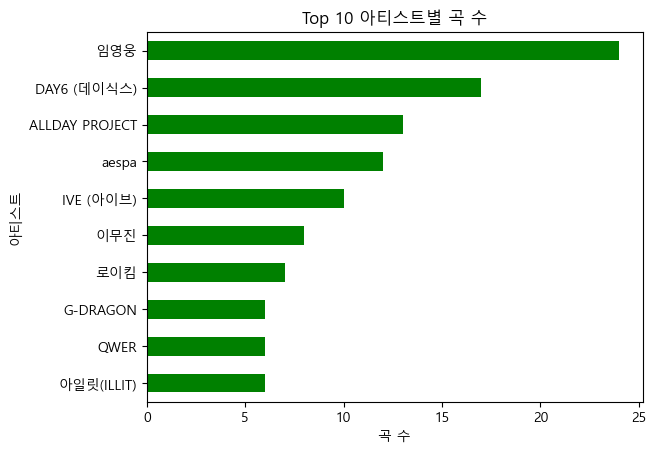

In [174]:
# 아티스트별 곡 수 집계
# concat_df에서 'Artist' 기준으로 그룹화(groupby)
artist_group = concat_df.groupby('아티스트 명')

# 각 아티스트의 곡 수 계산
artist_count = artist_group['곡 명'].count()

# 곡 수 기준으로 내림차순 정렬
artist_count_sorted = artist_count.sort_values(ascending=False)

# 상위 10명 선택
top_10_artists = artist_count_sorted.head(10)

# 그래프를 그리기 위해 y축이 많은 값이 위로 오도록 정렬
# 가로 막대그래프에서는 sort_values()로 정렬 후 plot하면 자동 적용
top_10_artists_sorted = top_10_artists.sort_values()

# 가로 막대 그래프 그리기
top_10_artists_sorted.plot(kind='barh', color='green')

# 그래프 레이블과 제목 추가
plt.xlabel('곡 수')                # x축 레이블
plt.ylabel('아티스트')            # y축 레이블
plt.title('Top 10 아티스트별 곡 수')  # 그래프 제목

plt.show()